In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

/opt/blue-python/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#|export
model = load_learner('model.pkl')

In [3]:
from icrawler import ImageDownloader
from icrawler.builtin import GoogleImageCrawler
from icrawler.builtin.google import GoogleFeeder, GoogleParser

class MyDownloader(ImageDownloader):
    def get_filename(self, task, default_ext):
        filename = super(MyDownloader, self).get_filename(task, default_ext)
        filename = filename.split(".")[0]
        return self.prefix + filename + ".png"

class MyCrawler(GoogleImageCrawler):
    def __init__(self, feeder_cls=GoogleFeeder, parser_cls=GoogleParser, downloader_cls=MyDownloader, prefix="", *args, **kwargs):
        super().__init__(feeder_cls, parser_cls, downloader_cls, *args, **kwargs)
        self.downloader.prefix = prefix

In [4]:
# We'll define a search_images function for the sake of ease

def search_images(term, max_images=30, folder_name="."):
    print(f"Searching for '{term}'")
    crawler = MyCrawler(
        prefix=term,
        storage={'root_dir': folder_name}, 
    )
    crawler.crawl(keyword=term, max_num=max_images)

In [10]:
# search_images("dog", 1)

In [27]:
# search_images("cat", 1)

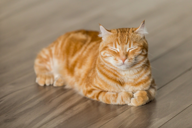

In [30]:
im = PILImage.create('cat.png')
im.thumbnail((192,192))
im

In [13]:
model.predict(im)

('False', tensor(0), tensor([9.9984e-01, 1.6374e-04]))

In [5]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = model.predict(img)
    return dict(zip(categories, map(float,probs)))

In [23]:
classify_image(im)

{'Dog': 0.9998362064361572, 'Cat': 0.00016373800463043153}

In [6]:
#|export
image = gr.Image(height=192, width=192)
label = gr.Label()
examples:list = ['./dog.png', './cat.png']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [13]:
import nbdev
nbdev.export.nb_export('deploy_classifier.ipynb', '.')
print('Export successful')

Export successful
